# 2D visualization example

* [The widgets can be seen at mybinder.org by clicking here](https://mybinder.org/v2/gh/tlinnet/mybinder_relax/master?filepath=nmrglue_s4_2d_plotting.ipynb)

## Introduction
This example is taken from Listing S4 from the 2013 JBNMR nmrglue paper. In this example a 2D SSNMR spectrum is visualized. 

* [Link to origin here.](https://github.com/jjhelmus/nmrglue/tree/master/examples/jbnmr_examples/s4_2d_plotting)
* [Modified with inspiration from here](https://github.com/jjhelmus/nmrglue/blob/master/examples/interactive/interactive_2d/2d_interactive.py)

## Get data

In [1]:
# Get data
import os, os.path
ng_dir = 'nmrglue_data/s4_2d_plotting'
if not os.path.exists(ng_dir):
    print("No %s. Downloading."%ng_dir)
    import urllib.request, zipfile
    zipf = 'jbnmr_s4_2d_plotting.zip'
    urllib.request.urlretrieve('https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/nmrglue/%s'%zipf, zipf)
    with zipfile.ZipFile(zipf,"r") as zip_ref:
        zip_ref.extractall("nmrglue_data")
    os.remove(zipf)

## Import packages

In [1]:
import numpy as np
import nmrglue as ng
import pandas as pd
# Plotting. Set backend. This must be done before importing.
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm

## Read data

In [2]:
# Specify data
ng_ft2 = 'nmrglue_data/s4_2d_plotting/test.ft2'

# read in data
ng_dic, ng_data = ng.pipe.read(ng_ft2)

# find PPM limits along each axis
uc_15n = ng.pipe.make_uc(ng_dic, ng_data, 0) # m, rows
uc_13c = ng.pipe.make_uc(ng_dic, ng_data, 1) # n, columns
x0, x1 = uc_13c.ppm_limits()
y0, y1 = uc_15n.ppm_limits()

# Print data size
print("x0,x1: %s,%s"% (x0, x1) )
print("y0,y1: %s,%s"% (y0, y1) )
dim = ng_data.shape
print("ng_data has dim: %s,%s"% (dim[0], dim[1]) )
print("Number of points: %s"% (dim[0]*dim[1]) )
print("Number of datapoints in the x-axis/columns: %s"%len(ng_data[0]))

x0,x1: 373.44005671816467,-24.31549673312111
y0,y1: 169.08728515307106,70.41490497639201
ng_data has dim: 2048,8192
Number of points: 16777216
Number of datapoints in the x-axis/columns: 8192


## With matplotlib

In [3]:
def plot_matplotlib(ng_data=None, plot_full = True):
    cmap = matplotlib.cm.Blues_r    # contour map (colors to use for contours)
    contour_start =  8.5e4          # contour level start value
    contour_num = 20                # number of contour levels
    contour_factor = 1.20           # scaling factor between contour levels
    # calculate contour levels
    cl = [contour_start * contour_factor ** x for x in range(contour_num)]

    # plot the spectrum
    #fig = plt.figure(figsize=(10, 10))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if plot_full:
        ax.contour(ng_data, cl, colors='blue', extent=(x0, x1, y0, y1), linewidths=0.5)
        # add 1D slices
        x = uc_13c.ppm_scale()
        s1 = ng_data[uc_15n("105.52ppm"), :]
        s2 = ng_data[uc_15n("115.85ppm"), :]
        s3 = ng_data[uc_15n("130.07ppm"), :]
        ax.plot(x, -s1 / 8e4 + 105.52, 'k-')
        ax.plot(x, -s2 / 8e4 + 115.85, 'k-')
        ax.plot(x, -s3 / 8e4 + 130.07, 'k-')

    else:
        x0_2 = 183.5
        x1_2 = 167.5
        y0_2 = 139.5
        y1_2 = 95.5
        x0_2_point = uc_13c("%sppm"%x0_2)
        x1_2_point = uc_13c("%sppm"%x1_2)
        y0_2_point = uc_15n("%sppm"%y0_2)
        y1_2_point = uc_15n("%sppm"%y1_2)
        print(y0_2_point,y1_2_point, x0_2_point,x1_2_point)
        # Extract data
        ng_data_lim = ng_data[y0_2_point:y1_2_point, x0_2_point:x1_2_point]
        # Plot
        ax.contour(ng_data_lim, cl, colors='blue', extent=(x0_2, x1_2, y0_2, y1_2), linewidths=0.5)

        # add 1D slices
        x = uc_13c.ppm_scale()[x0_2_point:x1_2_point]
        s1 = ng_data[uc_15n("105.52ppm"), :][x0_2_point:x1_2_point]
        s2 = ng_data[uc_15n("115.85ppm"), :][x0_2_point:x1_2_point]
        s3 = ng_data[uc_15n("130.07ppm"), :][x0_2_point:x1_2_point]
        
        ax.plot(x, -s1 / 8e4 + 105.52, 'k-')
        ax.plot(x, -s2 / 8e4 + 115.85, 'k-')
        ax.plot(x, -s3 / 8e4 + 130.07, 'k-')

    ax.set_xlabel("13C ppm", size=20)
    ax.set_ylabel("15N ppm", size=20)
    # label the axis and save
    ax.set_xlim(183.5, 167.5)
    ax.set_ylim(139.5, 95.5)
    
    return fig

<IPython.core.display.Javascript object>


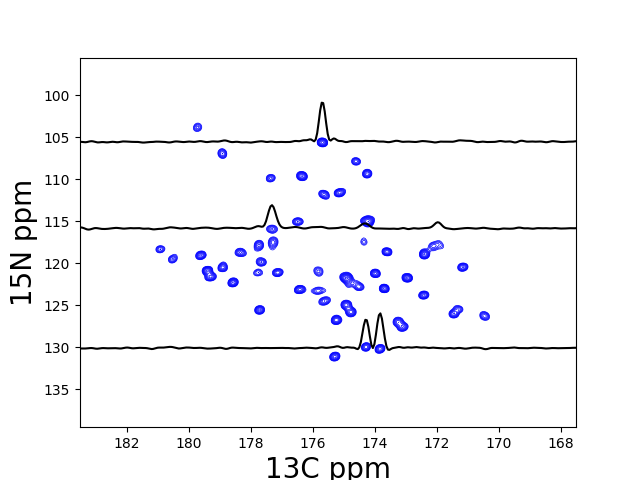

CPU times: user 6.46 s, sys: 320 ms, total: 6.78 s
Wall time: 6.79 s


In [4]:
%time fig = plot_matplotlib(ng_data=ng_data, plot_full=True)

<IPython.core.display.Javascript object>


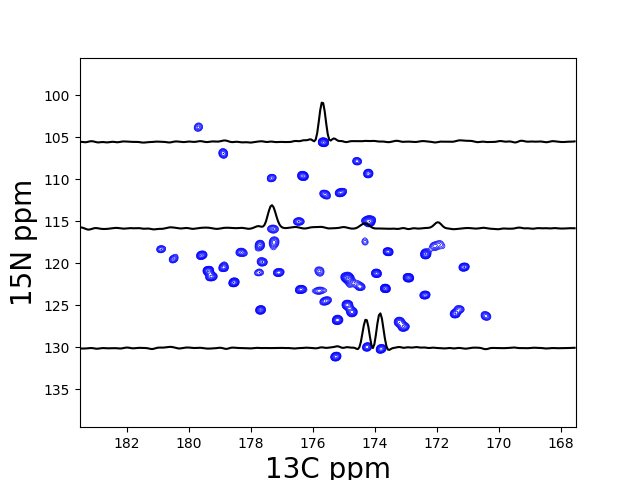

614 1527 3911 4241
CPU times: user 320 ms, sys: 0 ns, total: 320 ms
Wall time: 323 ms


In [5]:
%time fig = plot_matplotlib(ng_data=ng_data, plot_full=False)

## With bokeh

* [From here](https://github.com/bokeh/datashader/blob/master/examples/getting_started/2-Pipeline.ipynb)

In [7]:
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

N = 50
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, 4*N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=8, dh=10, palette="Spectral11")

show(p)

Loading BokehJS ...